<a href="https://colab.research.google.com/github/QiaoLin22/MASTER-LLM-DL/blob/main/LoRA_fine_tuning_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Examination and Embedding (hierarchical k-means)

In [ ]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install sentence-transformers -q

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.74k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/837k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9846 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/518 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9846 samples in 0.008s...
[t-SNE] Computed neighbors for 9846 samples in 5.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9846
[t-SNE] Computed conditional probabilities for sample 2000 / 9846
[t-SNE] Computed conditional probabilities for sample 3000 / 9846
[t-SNE] Computed conditional probabilities for sample 4000 / 9846
[t-SNE] Computed conditional probabilities for sample 5000 / 9846
[t-SNE] Computed conditional probabilities for sample 6000 / 9846
[t-SNE] Computed conditional probabilities for sample 7000 / 9846
[t-SNE] Computed conditional probabilities for sample 8000 / 9846
[t-SNE] Computed conditional probabilities for sample 9000 / 9846
[t-SNE] Computed conditional probabilities for sample 9846 / 9846
[t-SNE] Mean sigma: 0.993093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.953194
[t-SNE] KL divergence after 1000 iterations: 2.319500


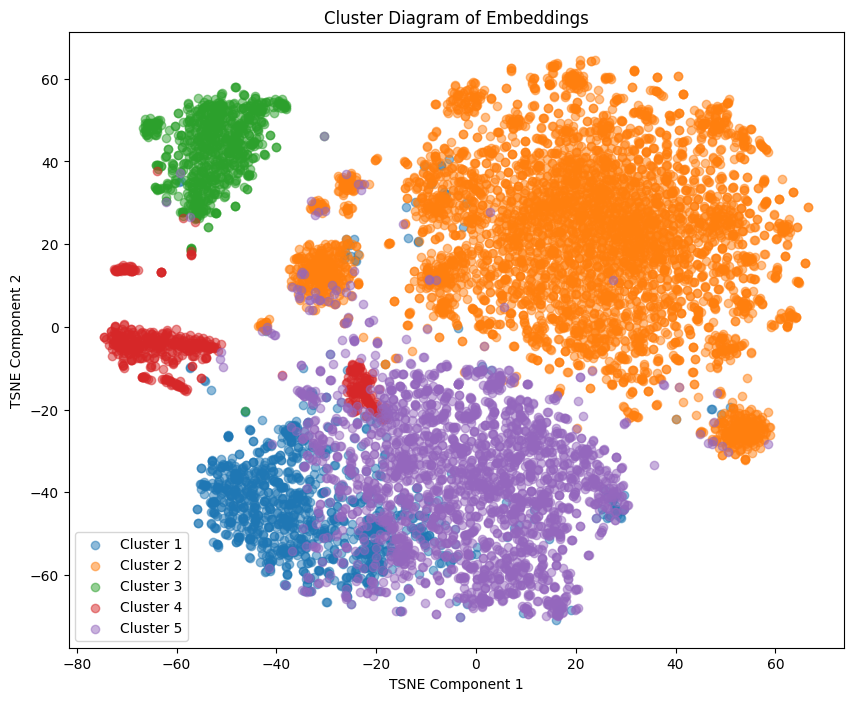

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from datasets import load_dataset
from sentence_transformers import SentenceTransformer

# Load datasets
dataset_name = "Trelis/openassistant-llama-style"
train_dataset = load_dataset(dataset_name, split="train")
eval_dataset = load_dataset(dataset_name, split="test")

# Load the model
model = SentenceTransformer("msmarco-distilbert-dot-v5")

# Create embeddings for the train dataset
train_texts = train_dataset['text']
train_embeddings = model.encode(train_texts, convert_to_tensor=True)

# Move embeddings to CPU and convert to numpy
train_embeddings_cpu = train_embeddings.cpu().numpy()

# Perform clustering (e.g., KMeans)
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = clustering_model.fit_predict(train_embeddings_cpu)

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_results = tsne.fit_transform(train_embeddings_cpu)

# Plotting the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    indices = np.where(cluster_assignments == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f'Cluster {i+1}', alpha=0.5)

plt.legend()
plt.title('Cluster Diagram of Embeddings')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

## Now let's try to pare down this dataset by selecting a fixed number of samples from each point.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9846 samples in 0.006s...
[t-SNE] Computed neighbors for 9846 samples in 5.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9846
[t-SNE] Computed conditional probabilities for sample 2000 / 9846
[t-SNE] Computed conditional probabilities for sample 3000 / 9846
[t-SNE] Computed conditional probabilities for sample 4000 / 9846
[t-SNE] Computed conditional probabilities for sample 5000 / 9846
[t-SNE] Computed conditional probabilities for sample 6000 / 9846
[t-SNE] Computed conditional probabilities for sample 7000 / 9846
[t-SNE] Computed conditional probabilities for sample 8000 / 9846
[t-SNE] Computed conditional probabilities for sample 9000 / 9846
[t-SNE] Computed conditional probabilities for sample 9846 / 9846
[t-SNE] Mean sigma: 0.993093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.953194
[t-SNE] KL divergence after 1000 iterations: 2.319500
KL divergence before clustering: 2.319

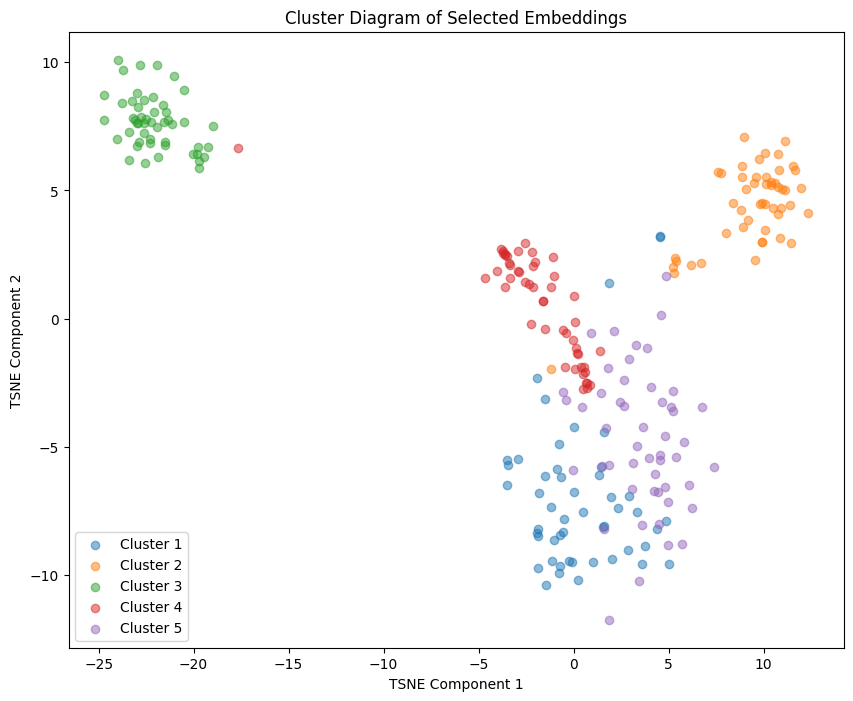

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Function to select a fixed number of samples from each cluster
def select_samples_per_cluster(data, cluster_assignments, num_clusters, max_samples_per_cluster):
    selected_data = []
    selected_labels = []
    for cluster in range(num_clusters):
        cluster_points = data[cluster_assignments == cluster]
        if len(cluster_points) > max_samples_per_cluster:
            sampled_indices = np.random.choice(len(cluster_points), max_samples_per_cluster, replace=False)
        else:
            sampled_indices = np.arange(len(cluster_points))
        selected_data.append(cluster_points[sampled_indices])
        selected_labels.extend([cluster] * len(sampled_indices))
    return np.vstack(selected_data), np.array(selected_labels)

# Function to perform clustering, print KL divergence, and visualize
def cluster_and_visualize(data, num_clusters, max_samples_per_cluster):
    # Calculate KL divergence before clustering
    tsne_initial = TSNE(n_components=2, verbose=1, random_state=123)
    tsne_results_initial = tsne_initial.fit_transform(data)
    kl_divergence_before = tsne_initial.kl_divergence_
    print(f"KL divergence before clustering: {kl_divergence_before}")

    clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_assignments = clustering_model.fit_predict(data)

    selected_data, selected_labels = select_samples_per_cluster(data, cluster_assignments, num_clusters, max_samples_per_cluster)

    # Reduce dimensionality for visualization and calculate KL divergence after clustering
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    tsne_results_selected = tsne.fit_transform(selected_data)
    kl_divergence_after = tsne.kl_divergence_
    print(f"KL divergence after clustering: {kl_divergence_after}")

    # Plotting the clusters after selection
    plt.figure(figsize=(10, 8))
    for i in range(num_clusters):
        indices = np.where(selected_labels == i)
        plt.scatter(tsne_results_selected[indices, 0], tsne_results_selected[indices, 1], label=f'Cluster {i+1}', alpha=0.5)

    plt.legend()
    plt.title('Cluster Diagram of Selected Embeddings')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

    return selected_data

# Assuming train_embeddings_cpu is already available from previous steps
# You can now call the following function to perform the next step of filtering and visualization

# Define parameters
num_clusters = 5
max_samples_per_cluster = 50

# Perform first step of clustering, filtering, and visualization
filtered_data = cluster_and_visualize(train_embeddings_cpu, num_clusters, max_samples_per_cluster)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.001s...
[t-SNE] Computed neighbors for 250 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 1.885006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.586273
[t-SNE] KL divergence after 1000 iterations: 0.456251
KL divergence before clustering: 0.4562511742115021
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.001s...
[t-SNE] Computed neighbors for 210 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 1.874031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.944401
[t-SNE] KL divergence after 1000 iterations: 0.322840
KL divergence after clustering: 0.3228401243686676


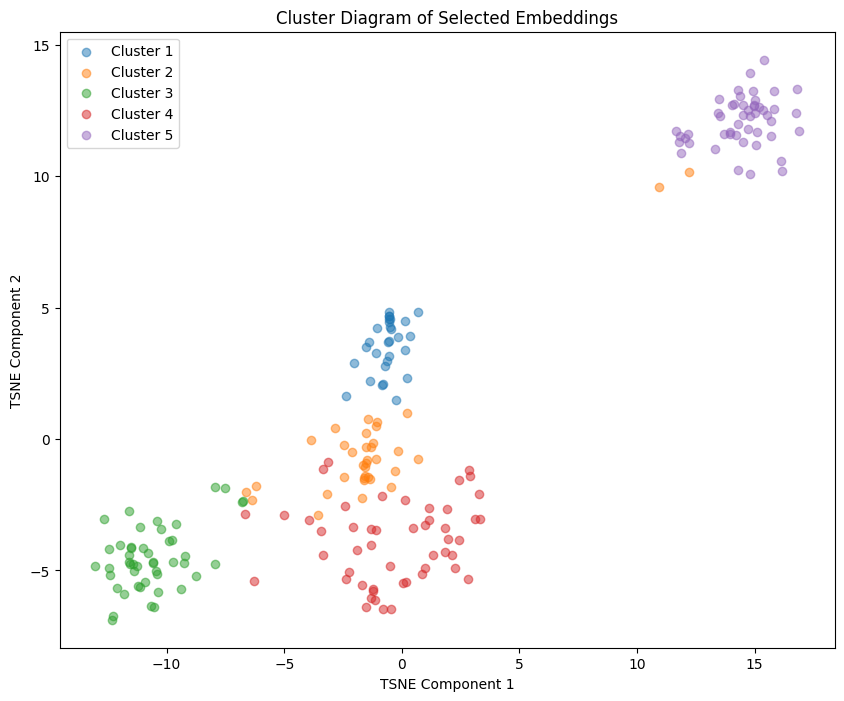

In [ ]:
# Perform second step of clustering, filtering, and visualization
filtered_data = cluster_and_visualize(filtered_data, num_clusters, max_samples_per_cluster)

## Training Code

In [6]:
!pip install accelerate transformers hf_transfer -q
# !pip install flash-attn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 71.9 MB/s eta 0:00:00


In [7]:
import os
# Setting the environment variable to enable fast downloads with the hf_transfer rust library.
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"

In [8]:
import transformers
import torch
from transformers import AutoModelForCausalLM

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    cache_dir='',
    device_map='auto',
    # attn_implementation="flash_attention_2",
    torch_dtype=torch.bfloat16)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, cache_dir='')

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [10]:
print(model)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 2048)
    (layers): ModuleList(
      (0-21): 22 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): 

In [11]:
!pip install peft -q

In [12]:
from peft import LoraConfig

lora_config = LoraConfig(
    target_modules=['gate_proj','k_proj'],
    lora_dropout=0.1, #prevent overfitting. Not supported unsloth.
    bias="none",
    task_type="CAUSAL_LM",
    modules_to_save=['lm_head','embed_tokens'],
    r=128, # rank
    lora_alpha=32,
    use_rslora=True,
)

In [13]:
alpha = 2000**0.5
print(alpha)

44.721359549995796


In [14]:
from peft import get_peft_model
model=get_peft_model(model,lora_config)

model.print_trainable_parameters()

trainable params: 159,186,944 || all params: 1,259,235,328 || trainable%: 12.6416


In [15]:
!pip install git+https://github.com/huggingface/trl.git -q -U

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install datasets -q

In [4]:
from datasets import load_dataset

dataset_name = "Trelis/openassistant-llama-style"

train_dataset = load_dataset(dataset_name, split="train[:100]")
eval_dataset = load_dataset(dataset_name, split="test[:10]")

print(train_dataset)
print(eval_dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.74k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/837k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9846 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/518 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 100
})
Dataset({
    features: ['text'],
    num_rows: 10
})


In [16]:
from trl import SFTTrainer, SFTConfig

trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    args=SFTConfig(
        # max_steps=1,
        max_seq_length=2048,
        dataset_text_field="text",
        num_train_epochs=1,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        gradient_accumulation_steps=4,
        do_eval=True,
        lr_scheduler_type="constant",
        learning_rate=1e-4,
        eval_strategy="steps",
        eval_steps=0.2,
        warmup_ratio=0.05,
        output_dir='./',
        gradient_checkpointing=True,
        gradient_checkpointing_kwargs={"use_reentrant": True}, # trl will soon require this (true is faster but more complicated and bug prone)
        logging_steps=1,
    )
    # peft_config=lora_config, #no need to pass this in if you have already applied the peft config.
)

trainer.train()

<ipython-input-16-a912cc50b037>:3: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss,Validation Loss
1,1.810500,1.517269
2,1.629500,1.482804
3,1.612800,1.459952


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

TrainOutput(global_step=3, training_loss=1.6842443943023682, metrics={'train_runtime': 363.6199, 'train_samples_per_second': 0.275, 'train_steps_per_second': 0.008, 'total_flos': 598431981010944.0, 'train_loss': 1.6842443943023682, 'epoch': 0.9230769230769231})

In [17]:
tokenizer.chat_template = "{% set loop_messages = messages %}{% for message in loop_messages %}{% set content = '<|start_header_id|>' + message['role'] + '<|end_header_id|>\n\n'+ message['content'] | trim + '<|eot_id|>' %}{% if loop.index0 == 0 %}{% set content = bos_token + content %}{% endif %}{{ content }}{% endfor %}{% if add_generation_prompt %}{{ '<|start_header_id|>assistant<|end_header_id|>\n\n' }}{% endif %}"